In [1]:
from textblob import TextBlob 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
clothingdf=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
clothingdf.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
clothingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
clothingdf.drop(["Unnamed: 0", "Clothing ID", "Age", "Recommended IND", "Positive Feedback Count", "Class Name"], axis = 1, inplace = True) 

In [7]:
clothingdf.head()

,Title,Review Text,Rating,Division Name,Department Name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


In [20]:
avg_rating = clothingdf.groupby(["Division Name", "Department Name"])["Rating"].mean()
avg_rating

Division Name   Department Name
General         Bottoms            4.260727
                Dresses            4.150318
                Jackets            4.225962
                Tops               4.136778
                Trend              3.852632
General Petite  Bottoms            4.315226
                Dresses            4.122328
                Intimate           4.242291
                Jackets            4.301587
                Tops               4.197520
                Trend              3.782609
Initmates       Intimate           4.275596
Name: Rating, dtype: float64

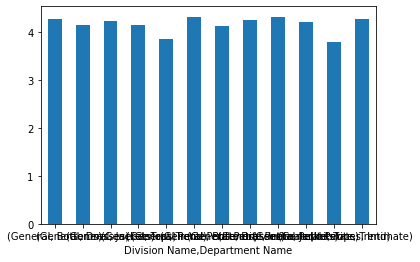

In [31]:
ax = avg_rating.plot.bar(x="mean", y=("Division Name", "Department Name"), rot=0)


In [33]:
TextBlob("I hated this dress. it looks awful").sentiment

Sentiment(polarity=-0.95, subjectivity=0.85)

In [35]:
TextBlob("Its really cheap and good quality").sentiment

Sentiment(polarity=0.55, subjectivity=0.65)

In [36]:
TextBlob("loved the dress").sentiment

Sentiment(polarity=0.7, subjectivity=0.8)

In [5]:
#drop na 

clothingdf.dropna(subset=['Review Text','Division Name'], inplace=True)

In [37]:
clothingdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            19662 non-null  object
 1   Review Text      22628 non-null  object
 2   Rating           22628 non-null  int64 
 3   Division Name    22628 non-null  object
 4   Department Name  22628 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [38]:
clothingdf['sentiment']=clothingdf['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [39]:
# visualise - whats the most negative / positive department and division 

clothingdf.head()

,Title,Review Text,Rating,Division Name,Department Name,sentiment
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891


In [41]:
avg_sentiment = clothingdf.groupby(["Division Name", "Department Name"])["sentiment"].mean()
avg_sentiment

Division Name   Department Name
General         Bottoms            0.245849
                Dresses            0.251091
                Jackets            0.237141
                Tops               0.247025
                Trend              0.203986
General Petite  Bottoms            0.259258
                Dresses            0.248380
                Intimate           0.239517
                Jackets            0.241773
                Tops               0.256835
                Trend              0.195925
Initmates       Intimate           0.256979
Name: sentiment, dtype: float64

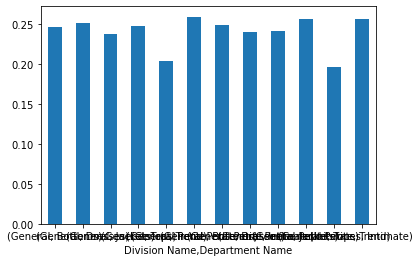

In [42]:
ax = avg_sentiment.plot.bar(x="mean", y=("Division Name", "Department Name"), rot=0)